# ライブラリの読み込み

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

# データ読み込み

In [22]:
# 土地データを読み込む
land_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data.csv")
# 売買日を datetime に変換
land_data["register_date"] = pd.to_datetime(land_data["register_date"])

# 建物データを読み込む
build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\build_data.csv")
# 売買日を datetime に変換
build_data["register_date"] = pd.to_datetime(build_data["register_date"])

# 区分建物データを読み込む
unit_build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\unit_build_data.csv")
# 売買日を datetime に変換
unit_build_data["register_date"] = pd.to_datetime(unit_build_data["register_date"])

C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_18408\3669519938.py:2: DtypeWarning: Columns (0,9,18,42) have mixed types. Specify dtype option on import or set low_memory=False.
  land_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data.csv")
C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_18408\3669519938.py:7: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\build_data.csv")
C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_18408\3669519938.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  unit_build_data = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\unit_build_data.csv")


# 欠損値の確認

In [36]:
len(land_data)

6821321

各列の欠損値の数:
days_between_sales    3635396
population_density          0
month_sin                   0
size                   880161
reason                      0
use_district          2879313
dtype: int64

各列の欠損値の割合:
days_between_sales    53.29
population_density     0.00
month_sin              0.00
size                  12.90
reason                 0.00
use_district          42.21
dtype: float64


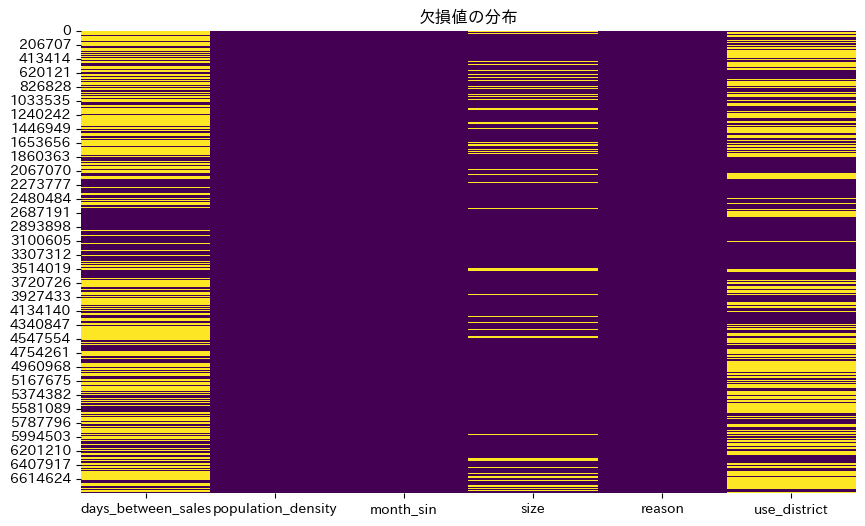


欠損値を含む行の例:
   days_between_sales  population_density     month_sin         size   reason  \
0                 NaN               306.6  8.660254e-01    97.700300  所有権移転売買   
1                 NaN               306.6  8.660254e-01   133.688607  所有権移転売買   
2                 NaN               306.6  1.000000e+00   434.124840  所有権移転売買   
3                 NaN               306.6  1.224647e-16  1704.969422  所有権移転売買   
4                 NaN               306.6  1.224647e-16   250.448122  所有権移転売買   

  use_district  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [30]:
# 必要な列を選択
selected_columns = ['days_between_sales', 'population_density', 'month_sin', 'size', 'reason', 'use_district']
land_data_subset = land_data[selected_columns].copy()


# 欠損値の確認
print("各列の欠損値の数:")
print(land_data_subset.isnull().sum())

print("\n各列の欠損値の割合:")
print((land_data_subset.isnull().sum() / len(land_data_subset) * 100).round(2))

# 欠損値の可視化
plt.figure(figsize=(10, 6))
sns.heatmap(land_data_subset.isnull(), cbar=False, cmap='viridis')
plt.title('欠損値の分布')
plt.show()

# 欠損値を含む行の例を表示
print("\n欠損値を含む行の例:")
print(land_data_subset[land_data_subset.isnull().any(axis=1)].head())

# 特徴量生成

## 人口密度

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200521&tstat=000001136464&cycle=0&tclass1=000001136466&stat_infid=000032142402&tclass2val=0　より

In [23]:
# 各都道府県の人口密度データを辞書形式で用意(令和2年度，最新版)　1km2あたりの人口
prefecture_density = {
    '北海道': 66.6, '青森県': 128.3, '岩手県': 79.2, '宮城県': 316.1, '秋田県': 82.4,
    '山形県': 114.6, '福島県': 133.0, '茨城県': 470.2, '栃木県': 301.7, '群馬県': 304.8,
    '埼玉県': 1934.0, '千葉県': 1218.5, '東京都': 6402.6, '神奈川県': 3823.2, '新潟県': 174.9,
    '富山県': 243.6, '石川県': 270.5, '福井県': 183.0, '山梨県': 181.4, '長野県': 151.0,
    '岐阜県': 186.3, '静岡県': 467.2, '愛知県': 1458.0, '三重県': 306.6, '滋賀県': 351.9,
    '京都府': 559.0, '大阪府': 4638.4, '兵庫県': 650.5, '奈良県': 358.8, '和歌山県': 195.3,
    '鳥取県': 157.8, '島根県': 100.1, '岡山県': 265.4, '広島県': 330.2, '山口県': 219.6,
    '徳島県': 173.5, '香川県': 506.3, '愛媛県': 235.2, '高知県': 97.3, '福岡県': 1029.8,
    '佐賀県': 332.5, '長崎県': 317.7, '熊本県': 234.6, '大分県': 177.2, '宮崎県': 138.3,
    '鹿児島県': 172.9, '沖縄県': 642.9
}

In [24]:
# DataFrameに人口密度カラムを追加
land_data['population_density'] = land_data['pref'].map(prefecture_density)
build_data['population_density'] = build_data['pref'].map(prefecture_density)
unit_build_data['population_density'] = unit_build_data['pref'].map(prefecture_density)

# 結果を確認
land_data.head()

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,chiban,...,id,line_name,station_name,on_foot,parcel_num,address_group,group_key,sale_count,days_between_sales,population_density
0,1938,2023-02-22,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,1047-1,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1047-1,1,NaN,306.6
1,1195,2022-02-01,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,1220,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1220,1,NaN,306.6
2,3260,2022-03-16,連続,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,2085,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2085,1,NaN,306.6
3,8554,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,NaN,NaN,2185,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2185,1,NaN,306.6
4,8608,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町中山,NaN,...,NaN,NaN,NaN,NaN,148-14,三重県_いなべ市_いなべ市北勢町中山,三重県_いなべ市_いなべ市北勢町中山_148-14,1,NaN,306.6


## 登記月

In [25]:
def encode_month(df, date_col):
    # 月を抽出
    df['month'] = pd.to_datetime(df[date_col]).dt.month
    
    # 月の循環的性質を表現する
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
    return df

# データフレームに新しいカラムを追加
land_data = encode_month(land_data, 'register_date')
build_data = encode_month(build_data, 'register_date')
unit_build_data = encode_month(unit_build_data, 'register_date')

# 不要な month カラムを削除して、sin と cos のカラムだけ残す
land_data.drop(columns=['month'], inplace=True)
build_data.drop(columns=['month'], inplace=True)
unit_build_data.drop(columns=['month'], inplace=True)

# 結果を表示
land_data.head()

,register_num,register_date,register_type,reason,pref,city,new_or_existing,type,location,chiban,...,station_name,on_foot,parcel_num,address_group,group_key,sale_count,days_between_sales,population_density,month_sin,month_cos
0,1938,2023-02-22,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,1047-1,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1047-1,1,NaN,306.6,8.660254e-01,5.000000e-01
1,1195,2022-02-01,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,1220,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_1220,1,NaN,306.6,8.660254e-01,5.000000e-01
2,3260,2022-03-16,連続,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,2085,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2085,1,NaN,306.6,1.000000e+00,6.123234e-17
3,8554,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町下平,NaN,...,NaN,NaN,2185,三重県_いなべ市_いなべ市北勢町下平,三重県_いなべ市_いなべ市北勢町下平_2185,1,NaN,306.6,1.224647e-16,-1.000000e+00
4,8608,2023-06-09,単独,所有権移転売買,三重県,いなべ市,既,土地,いなべ市北勢町中山,NaN,...,NaN,NaN,148-14,三重県_いなべ市_いなべ市北勢町中山,三重県_いなべ市_いなべ市北勢町中山_148-14,1,NaN,306.6,1.224647e-16,-1.000000e+00


## ダミー変数化する

In [26]:
# カテゴリカルな列をダミー変数に変換する
land_data = pd.get_dummies(land_data, prefix='dummy', columns=['use_district'], drop_first=True)
build_data = pd.get_dummies(build_data, prefix='dummy', columns=['use_district'], drop_first=True)
unit_build_data = pd.get_dummies(unit_build_data, prefix='dummy', columns=['use_district'], drop_first=True)

# 順序ロジスティック回帰

## 土地のみ

### 不均衡対策をしない

### 時系列ホールドアウト

In [58]:
# 目的変数の作成
# sales1_periodを30、90、180、360のカテゴリに変換
def categorize_period(days):
    # 欠損値を除外
    if pd.isnull(days):
        return np.nan
    elif days == 0:
        return np.nan
    elif days <= 365:
        return 1
    elif days <= 365 * 2:
        return 2
    elif days <= 365 * 3 + 1:
        return 3
    elif days <= 365 * 4 + 1:
        return 4
    elif days <= 365 * 5 + 1:
        return 5
    # 5年を超える場合は、欠損値として扱う
    else:
        return np.nan

land_data['sales1_category'] = land_data['days_between_sales'].apply(categorize_period)

# 各クラスの数を計算
class_counts = land_data['sales1_category'].value_counts()

In [59]:
class_counts

sales1_category
1.0    675645
2.0    104054
3.0     30111
4.0     17177
5.0     12472
Name: count, dtype: int64

どの日付で区切るか（学習：テスト＝8:2位）

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd

# ---- 1. データ読み込みと選択 ----
quantitative_cols = ['population_density', 'month_sin', 'size']
selected_columns = ['sales1_category', 'register_date'] + quantitative_cols 

# 欠損除去と抽出
land_data_subset = land_data[selected_columns].dropna()
land_data_subset = land_data_subset.sort_values('register_date')  # 念のため日付順に

# データの分割点を計算
split_point = int(len(land_data_subset) * 0.8)

# ---- 2. 時系列分割 ----
# cutoff_date = pd.to_datetime("2021-01-01")  # ← 任意に調整
# データを8:2に分割
train_data = land_data_subset.iloc[:split_point]
test_data = land_data_subset.iloc[split_point:]

# 目的変数と説明変数
y_train = train_data['sales1_category'].astype(int)
X_train = train_data.drop(['sales1_category', 'register_date'], axis=1)
y_test  = test_data['sales1_category'].astype(int)
X_test  = test_data.drop(['sales1_category', 'register_date'], axis=1)

# ---- 3. 標準化（量的変数のみ） ----
scaler = StandardScaler()
X_train[quantitative_cols] = scaler.fit_transform(X_train[quantitative_cols])
X_test[quantitative_cols] = scaler.transform(X_test[quantitative_cols])  # ← fit し直さない！

# ---- 4. モデル構築と予測 ----
# model = OrderedModel(y_train, X_train, distr='logit')
# result = model.fit(method='bfgs', disp=True)


model = OrderedModel(y_train, X_train, distr='logit')
result = model.fit()


# 予測（確率 → 最も高いクラス）
pred_probs = result.predict(X_test)
# 予測確率をデータフレームに変換 モデルの出力ラベルは0-5なので+1
y_pred = pred_probs.idxmax(axis=1).astype(int) + 1



# ---- 5. 評価 ----
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"時系列ホールドアウト評価")
print(f"Accuracy: {accuracy:.4f}")
print(f"MAE     : {mae:.4f}")


d:\fujiwara\M\.venv\lib\site-packages\statsmodels\base\optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,


時系列ホールドアウト評価
Accuracy: 0.9577
MAE     : 0.0423


d:\fujiwara\M\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
pred_probs

,0,1,2,3,4,5
776978,0.714956,0.151226,0.046982,0.061906,0.019176,0.005754
449271,0.711747,0.152606,0.047559,0.062774,0.019470,0.005844
4148299,0.723333,0.147584,0.045480,0.059661,0.018420,0.005521
1797947,0.712819,0.152146,0.047366,0.062484,0.019372,0.005814
4443442,0.710888,0.152974,0.047714,0.063007,0.019549,0.005868
...,...,...,...,...,...,...
443136,0.720378,0.148876,0.046009,0.060450,0.018685,0.005603
716658,0.723387,0.147561,0.045470,0.059647,0.018415,0.005520
4478952,0.719621,0.149205,0.046145,0.060652,0.018753,0.005623
1675083,0.721292,0.148477,0.045845,0.060205,0.018603,0.005577


In [46]:
# 予測と正解のクラス確認
print("y_pred classes:", y_pred.unique())
print("y_test classes:", y_test.unique())

# 予測の分布
print("\n予測されたクラスの分布:")
print(y_pred.value_counts())

# 正解の分布
print("\n実際のクラスの分布:")
print(y_test.value_counts())


y_pred classes: [1]
y_test classes: [1 2]

予測されたクラスの分布:
1    157051
Name: count, dtype: int64

実際のクラスの分布:
sales1_category
1    150406
2      6645
Name: count, dtype: int64


おかしいポイント1

0を予測するってどういうこと？カテゴリは1-6のはず
0~5になってるから



おかしいポイント2

テストデータは後だから後ろのカテゴリがないのか！

時系列のホールドアウトはダメかもな

K分割でもリークは起こらないからK分割かなあ

### 学習データ→2014~2018，テストデータ→2019~2023


==== 時系列ホールドアウト（2014〜2018学習、2019〜2023評価） ====
Accuracy: 0.8438
MAE     : 0.2043

==== 混同行列 ====
         予測:〜1年  予測:1〜2年  予測:2〜3年  予測:3〜4年  予測:4〜5年
実際:〜1年   418317        0        0        0        0
実際:1〜2年   60209        0        0        0        0
実際:2〜3年   11856        0        0        0        0
実際:3〜4年    4160        0        0        0        0
実際:4〜5年    1219        0        0        0        0


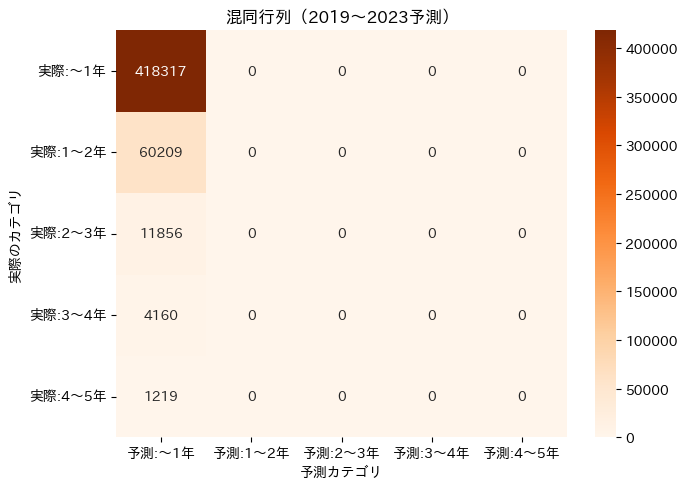

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
from statsmodels.miscmodels.ordinal_model import OrderedModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. データの準備 ----
quantitative_cols = ['population_density', 'month_sin', 'size']
selected_columns = ['sales1_category', 'register_date'] + quantitative_cols

# 欠損除去・日付型に変換・ソート
land_data_subset = land_data[selected_columns].dropna().copy()
land_data_subset['register_date'] = pd.to_datetime(land_data_subset['register_date'])
land_data_subset = land_data_subset.sort_values("register_date")

X_all = land_data_subset.drop(['sales1_category', 'register_date'], axis=1)
y_all = land_data_subset['sales1_category'].astype(int)
date_all = land_data_subset['register_date']

# カテゴリラベル（日本語）
category_labels = {
    1: '〜1年',
    2: '1〜2年',
    3: '2〜3年',
    4: '3〜4年',
    5: '4〜5年'
}
unique_labels = sorted(y_all.unique())

# ---- 2. 明示的な時系列分割（2014〜2018 vs 2019〜2023） ----
train_mask = (date_all < pd.to_datetime("2019-01-01"))
test_mask  = (date_all >= pd.to_datetime("2019-01-01"))

X_train = X_all[train_mask].copy()
X_test  = X_all[test_mask].copy()
y_train = y_all[train_mask]
y_test  = y_all[test_mask]

# 標準化（量的変数のみ）
scaler = StandardScaler()
X_train[quantitative_cols] = scaler.fit_transform(X_train[quantitative_cols])
X_test[quantitative_cols] = scaler.transform(X_test[quantitative_cols])

# ---- 3. モデル構築と予測 ----
model = OrderedModel(y_train, X_train, distr='logit')
result = model.fit(method='bfgs', disp=False)

# 予測（0始まりなので+1）
pred_probs = result.predict(X_test)
y_pred = pred_probs.idxmax(axis=1).astype(int) + 1

# ---- 4. 評価 ----
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n==== 時系列ホールドアウト（2014〜2018学習、2019〜2023評価） ====")
print(f"Accuracy: {accuracy:.4f}")
print(f"MAE     : {mae:.4f}")

# ---- 5. 混同行列 ----
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm,
                     index=[f"実際:{category_labels[i]}" for i in unique_labels],
                     columns=[f"予測:{category_labels[i]}" for i in unique_labels])

print("\n==== 混同行列 ====")
print(cm_df)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.title("混同行列（2019〜2023予測）")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()


In [70]:
pred_probs

,0,1,2,3,4
3053409,0.750974,0.125994,0.052236,0.037665,0.033131
3995941,0.651772,0.163863,0.075029,0.057014,0.052321
4888738,0.656012,0.162424,0.074040,0.056124,0.051400
3524649,0.751132,0.125927,0.052200,0.037636,0.033104
5894819,0.695645,0.148166,0.064847,0.048087,0.043255
...,...,...,...,...,...
716658,0.680454,0.153799,0.068357,0.051109,0.046281
4478952,0.669355,0.157784,0.070933,0.053362,0.048566
1330395,0.678597,0.154474,0.068787,0.051483,0.046659
1675083,0.672437,0.156689,0.070217,0.052733,0.047925


### 損失関数の調整


==== mord + 正規化逆数重み（2014〜2018学習、2019〜2023評価） ====
Accuracy: 0.0240
MAE     : 1.8222

==== 混同行列 ====
         予測:〜1年  予測:1〜2年  予測:2〜3年  予測:3〜4年  予測:4〜5年
実際:〜1年       18       27   418272        0        0
実際:1〜2年       3        2    60204        0        0
実際:2〜3年       1        1    11854        0        0
実際:3〜4年       0        0     4160        0        0
実際:4〜5年       0        0     1219        0        0


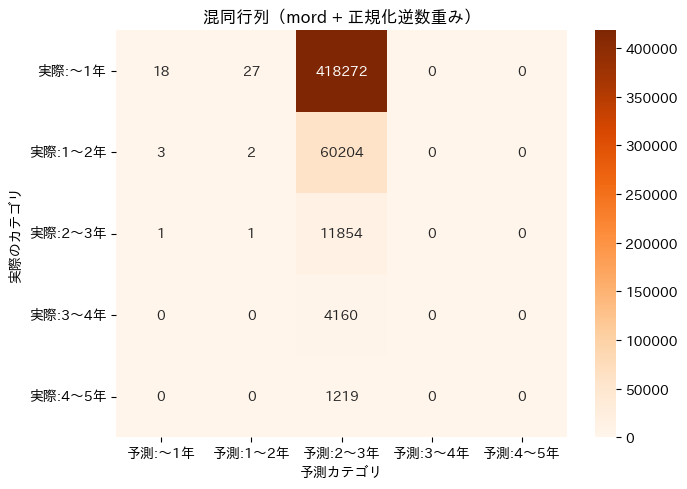

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
from mord import LogisticAT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. データの準備 ----
quantitative_cols = ['population_density', 'month_sin', 'size']
selected_columns = ['sales1_category', 'register_date'] + quantitative_cols

land_data_subset = land_data[selected_columns].dropna().copy()
land_data_subset['register_date'] = pd.to_datetime(land_data_subset['register_date'])
land_data_subset = land_data_subset.sort_values("register_date")

X_all = land_data_subset.drop(['sales1_category', 'register_date'], axis=1)
y_all = land_data_subset['sales1_category'].astype(int)
date_all = land_data_subset['register_date']

# カテゴリラベル（日本語）
category_labels = {
    1: '〜1年',
    2: '1〜2年',
    3: '2〜3年',
    4: '3〜4年',
    5: '4〜5年'
}
unique_labels = sorted(y_all.unique())

# ---- 2. 時系列分割（2014〜2018: 学習, 2019〜2023: テスト）----
train_mask = (date_all < pd.to_datetime("2019-01-01"))
test_mask  = (date_all >= pd.to_datetime("2019-01-01"))

X_train = X_all[train_mask].copy()
X_test  = X_all[test_mask].copy()
y_train = y_all[train_mask].copy()
y_test  = y_all[test_mask].copy()

# ---- 3. 指定された数式でクラス重みを計算 ----
class_counts = y_train.value_counts().sort_index()
N = len(y_train)
inv_counts = 1 / class_counts
sum_inv = inv_counts.sum()
class_weights = (inv_counts / sum_inv) * N  # 正規化された逆数重み

# ---- 4. サンプルごとの重みを計算 ----
sample_weights = y_train.map(class_weights)

# ---- 5. 重みに比例して学習データを複製（整数化）----
rep_counts = (sample_weights / sample_weights.min()).round().astype(int)

X_train_rep = X_train.loc[np.repeat(X_train.index, rep_counts)].copy()
y_train_rep = y_train.loc[np.repeat(y_train.index, rep_counts)].copy()

# ---- 6. mord 用にラベルを 0 始まりに変換 ----
y_train_mord = y_train_rep - 1
y_test_mord = y_test - 1

# ---- 7. 標準化 ----
scaler = StandardScaler()
X_train_rep[quantitative_cols] = scaler.fit_transform(X_train_rep[quantitative_cols])
X_test[quantitative_cols] = scaler.transform(X_test[quantitative_cols])

# ---- 8. モデル構築と予測 ----
model = LogisticAT(alpha=1.0)
model.fit(X_train_rep, y_train_mord)

y_pred_mord = model.predict(X_test)
y_pred = y_pred_mord + 1

# ---- 9. 評価 ----
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n==== mord + 正規化逆数重み（2014〜2018学習、2019〜2023評価） ====")
print(f"Accuracy: {accuracy:.4f}")
print(f"MAE     : {mae:.4f}")

# ---- 10. 混同行列 ----
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm,
                     index=[f"実際:{category_labels[i]}" for i in unique_labels],
                     columns=[f"予測:{category_labels[i]}" for i in unique_labels])

print("\n==== 混同行列 ====")
print(cm_df)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.title("混同行列（mord + 正規化逆数重み）")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()


### K分割交差検証法

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. データの準備 ----
quantitative_cols = ['population_density', 'month_sin', 'size']
selected_columns = ['sales1_category'] + quantitative_cols

# 欠損除去
land_data_subset = land_data[selected_columns].dropna()
X = land_data_subset.drop('sales1_category', axis=1)
y = land_data_subset['sales1_category'].astype(int)

# カテゴリラベル（日本語）
category_labels = {
    1: '〜1年',
    2: '1〜2年',
    3: '2〜3年',
    4: '3〜6年',
    5: '6〜8年',
    6: '8〜10年'
}
label_names = [category_labels[i] for i in sorted(y.unique())]

# ---- 2. K-fold 交差検証 ----
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
maes = []
all_y_true = []
all_y_pred = []

unique_labels = sorted(y.unique())  # すべてのクラス

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 標準化（量的変数のみ）
    scaler = StandardScaler()
    X_train[quantitative_cols] = scaler.fit_transform(X_train[quantitative_cols])
    X_test[quantitative_cols] = scaler.transform(X_test[quantitative_cols])

    # モデル構築
    model = OrderedModel(y_train, X_train, distr='logit')
    result = model.fit(method='bfgs', disp=False)

    # 予測（0始まりなので+1）
    pred_probs = result.predict(X_test)
    y_pred = pred_probs.idxmax(axis=1).astype(int) + 1

    # 評価
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracies.append(acc)
    maes.append(mae)

    # 混同行列（Foldごと）
    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
    cm_df = pd.DataFrame(cm, index=[f"実際:{category_labels[i]}" for i in unique_labels],
                             columns=[f"予測:{category_labels[i]}" for i in unique_labels])

    print(f"\n[Fold {fold+1}] Accuracy: {acc:.4f}, MAE: {mae:.4f}")
    print(f"[Fold {fold+1}] Confusion Matrix:")
    print(cm_df)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"混同行列 - Fold {fold+1}")
    plt.xlabel("予測カテゴリ")
    plt.ylabel("実際のカテゴリ")
    plt.tight_layout()
    plt.show()

    # 全体用に蓄積
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

# ---- 3. 結果まとめ ----
print("\n==== K-fold クロスバリデーション結果 ====")
print(f"平均 Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"平均 MAE     : {np.mean(maes):.4f} ± {np.std(maes):.4f}")

# ---- 4. 全体の混同行列 ----
cm_all = confusion_matrix(all_y_true, all_y_pred, labels=unique_labels)
cm_all_df = pd.DataFrame(cm_all,
                         index=[f"実際:{category_labels[i]}" for i in unique_labels],
                         columns=[f"予測:{category_labels[i]}" for i in unique_labels])

print("\n==== 全体の混同行列 ====")
print(cm_all_df)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_all_df, annot=True, fmt='d', cmap='Oranges')
plt.title("混同行列（全体）")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()
